In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing Data
df = pd.read_csv("sorted_data.csv")

In [4]:
print("Return first 5 rows.")
df.head()

Return first 5 rows.


,DateTime,Consumption,Month,Year,Date,Time,Week,Day
0,2016-01-01 01:00:00,10800,1,2016,2016-01-01,01:00:00,53,Friday
1,2016-01-01 02:00:00,10431,1,2016,2016-01-01,02:00:00,53,Friday
2,2016-01-01 03:00:00,10005,1,2016,2016-01-01,03:00:00,53,Friday
3,2016-01-01 04:00:00,9722,1,2016,2016-01-01,04:00:00,53,Friday
4,2016-01-01 05:00:00,9599,1,2016,2016-01-01,05:00:00,53,Friday


In [5]:
print("Return last 5 rows.",)
df.tail()

Return last 5 rows.


,DateTime,Consumption,Month,Year,Date,Time,Week,Day
52961,2021-12-31 20:00:00,11447,12,2021,2021-12-31,20:00:00,52,Friday
52962,2021-12-31 21:00:00,11237,12,2021,2021-12-31,21:00:00,52,Friday
52963,2021-12-31 22:00:00,10914,12,2021,2021-12-31,22:00:00,52,Friday
52964,2021-12-31 23:00:00,10599,12,2021,2021-12-31,23:00:00,52,Friday
52965,2022-01-01 00:00:00,10812,1,2022,2022-01-01,00:00:00,52,Saturday


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DateTime     52966 non-null  object
 1   Consumption  52966 non-null  int64 
 2   Month        52966 non-null  int64 
 3   Year         52966 non-null  int64 
 4   Date         52966 non-null  object
 5   Time         52966 non-null  object
 6   Week         52966 non-null  int64 
 7   Day          52966 non-null  object
dtypes: int64(4), object(4)
memory usage: 3.2+ MB


In [7]:
#print("Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.", "\n")
print(df.describe())

        Consumption         Month          Year          Week
count  52966.000000  52966.000000  52966.000000  52966.000000
mean    9488.750519      6.540479   2018.502511     26.675716
std     1576.241673      3.444558      1.703718     15.047183
min     5341.000000      1.000000   2016.000000      1.000000
25%     8322.000000      4.000000   2017.000000     14.000000
50%     9277.000000      7.000000   2019.000000     27.000000
75%    10602.000000     10.000000   2020.000000     40.000000
max    15105.000000     12.000000   2022.000000     53.000000


In [8]:
print("Total Number of Years: ", df.Year.nunique() )
print(df.Year.unique())

Total Number of Years:  7
[2016 2017 2018 2019 2020 2021 2022]


In [9]:
# By assuming week starts on Mondey and ends on Sunday.
# The closest start would be on Monday 4-1-2016 
# The closest end would be on sunday 26-12-2021
# So we should omit first 71 rows and last 121 rows.
dataset = df[71:-121]
dataset.tail()

,DateTime,Consumption,Month,Year,Date,Time,Week,Day
52840,2021-12-26 19:00:00,12550,12,2021,2021-12-26,19:00:00,51,Sunday
52841,2021-12-26 20:00:00,12622,12,2021,2021-12-26,20:00:00,51,Sunday
52842,2021-12-26 21:00:00,12574,12,2021,2021-12-26,21:00:00,51,Sunday
52843,2021-12-26 22:00:00,12384,12,2021,2021-12-26,22:00:00,51,Sunday
52844,2021-12-26 23:00:00,12044,12,2021,2021-12-26,23:00:00,51,Sunday


In [10]:
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'])
dataset.set_index('DateTime', inplace=True)

C:\Users\bhush\AppData\Local\Temp\ipykernel_26944\2502220656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['DateTime'] = pd.to_datetime(dataset['DateTime'])


C:\Users\bhush\AppData\Local\Temp\ipykernel_26944\3418357556.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


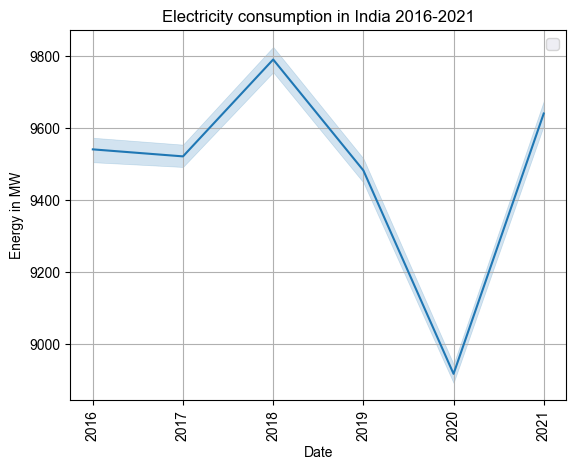

In [11]:
from matplotlib import style
fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))

style.use("ggplot")
sns.lineplot(x= dataset["Year"], y= dataset["Consumption"], data = dataset)
sns.set(rc={'figure.figsize': (20,10)})

plt.title("Electricity consumption in India 2016-2021")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)

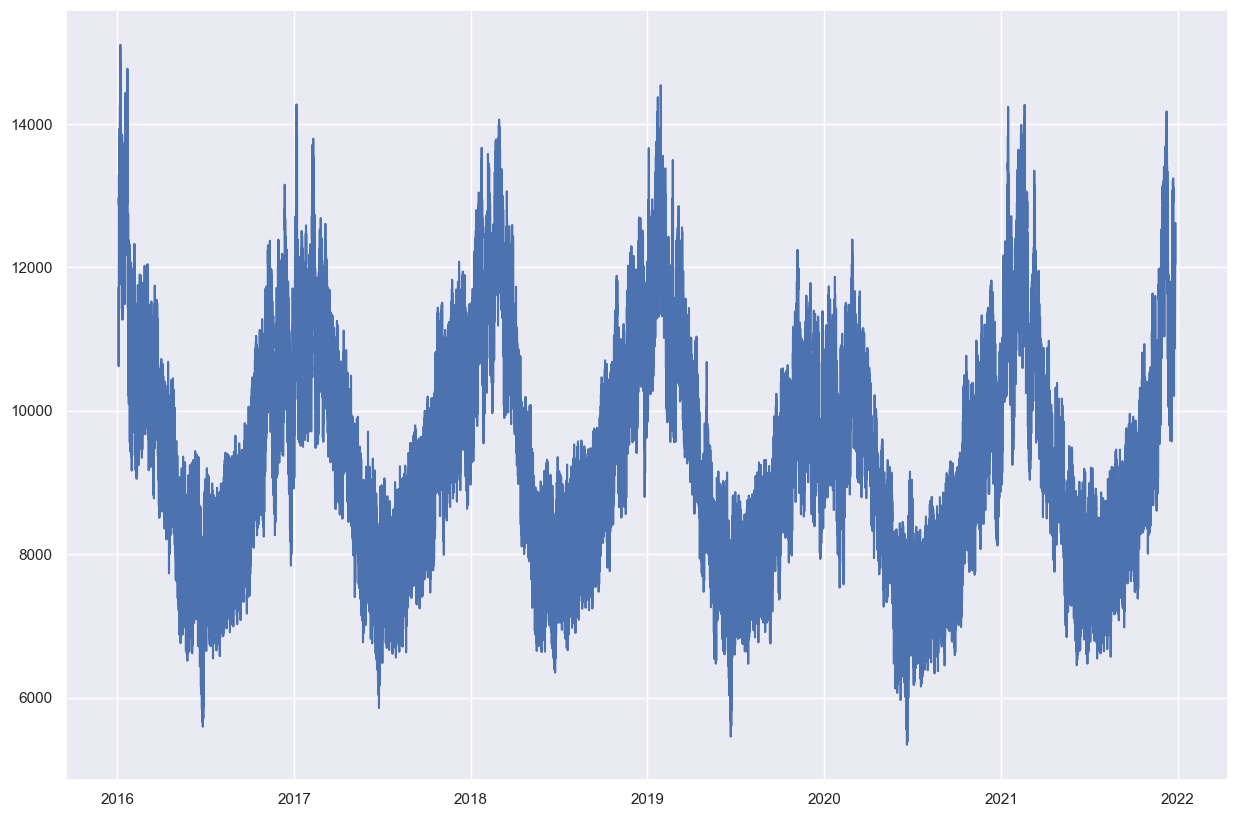

In [12]:
plt.figure(figsize=(15,10))
plt.plot(dataset["Consumption"])

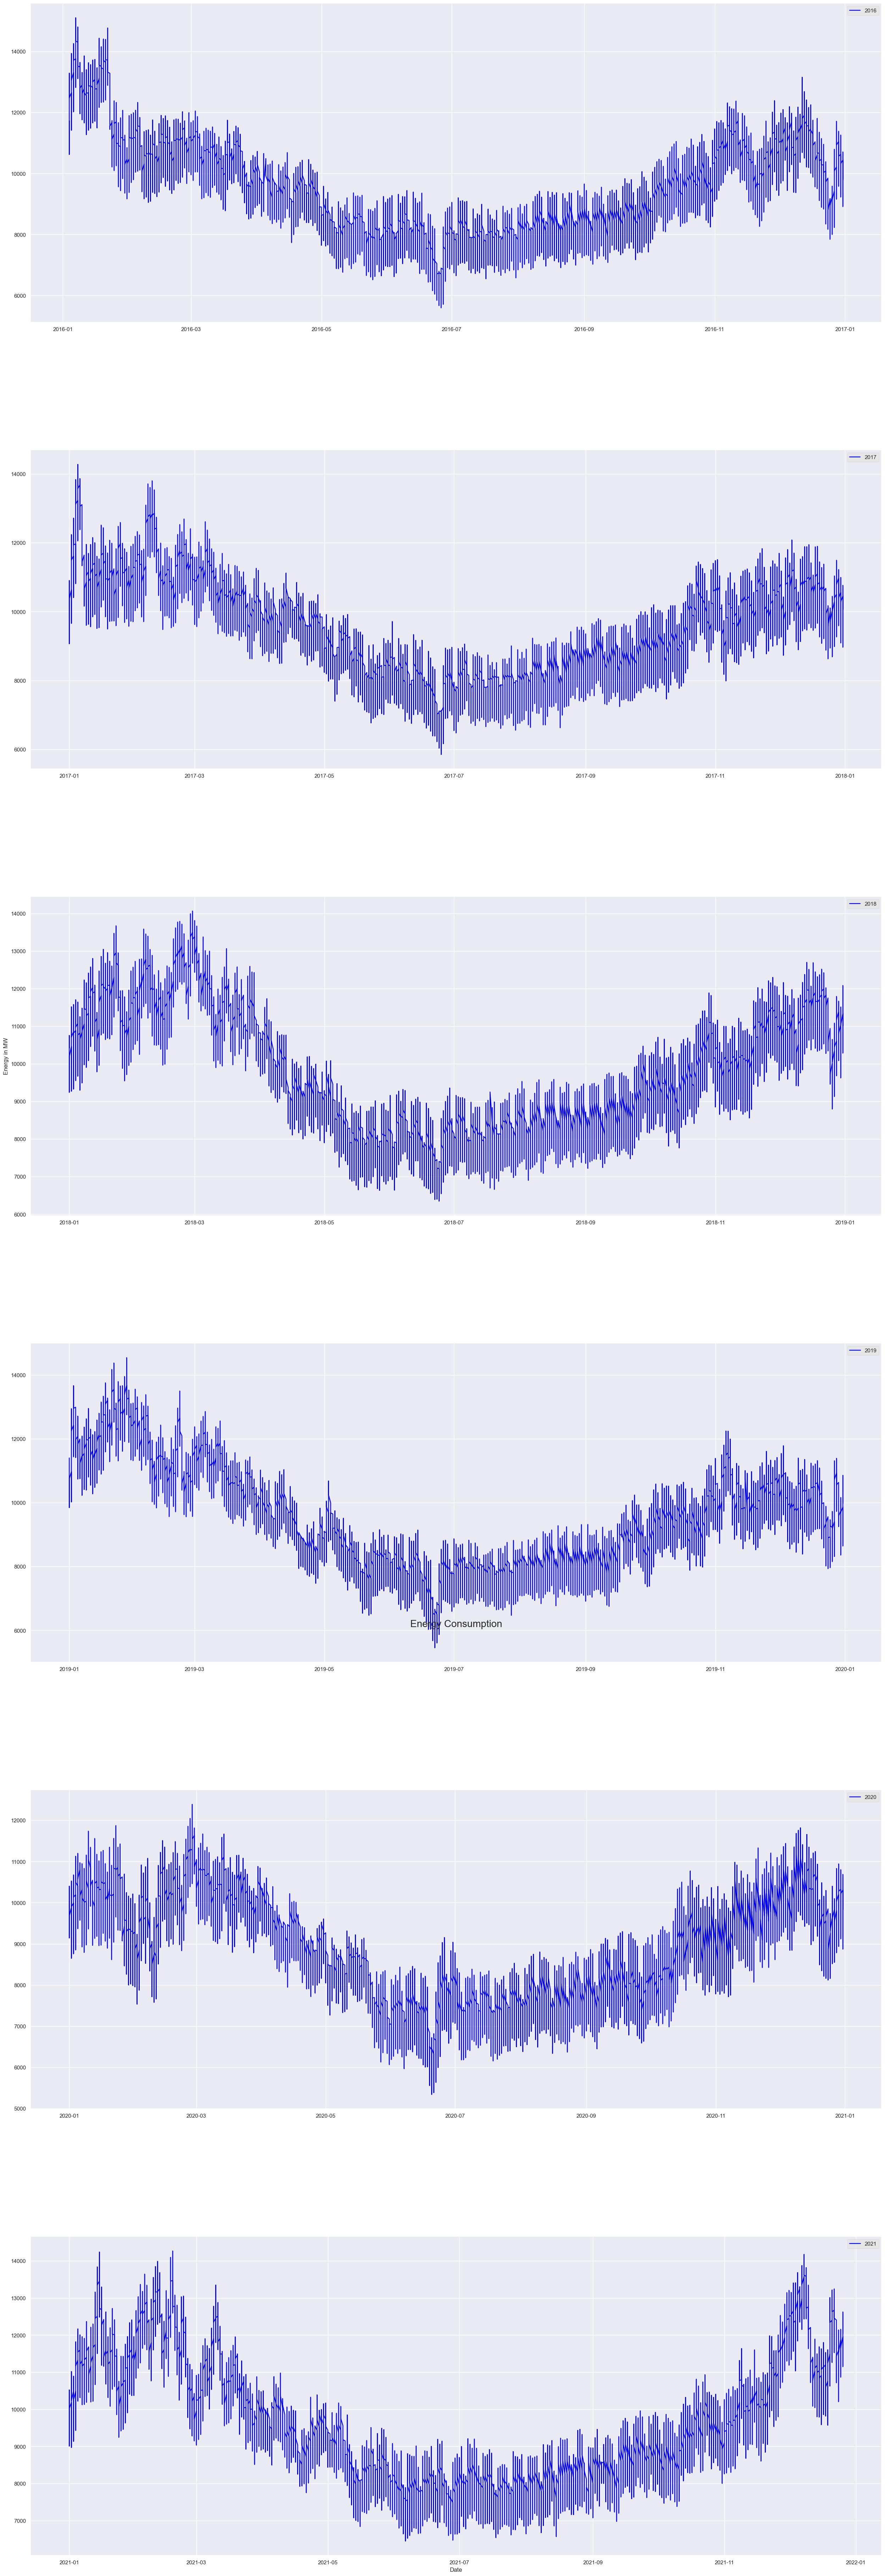

In [13]:
# Energy Consumption Each Year
from matplotlib import style

fig = plt.figure(figsize = (30,30))

ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)

style.use("ggplot")

# Extract data for each year correctly
y_2016 = dataset.loc["2016", "Consumption"].to_list()
x_2016 = dataset.loc["2016"].index.date.tolist()  
ax1.plot(x_2016, y_2016, color="blue", linewidth=1.7)

y_2017 = dataset.loc["2017", "Consumption"].to_list()
x_2017 = dataset.loc["2017"].index.date.tolist()
ax2.plot(x_2017, y_2017, color="blue", linewidth=1.7)

y_2018 = dataset.loc["2018", "Consumption"].to_list()
x_2018 = dataset.loc["2018"].index.date.tolist()
ax3.plot(x_2018, y_2018, color="blue", linewidth=1.7)

y_2019 = dataset.loc["2019", "Consumption"].to_list()
x_2019 = dataset.loc["2019"].index.date.tolist()
ax4.plot(x_2019, y_2019, color="blue", linewidth=1.7)

y_2020 = dataset.loc["2020", "Consumption"].to_list()
x_2020 = dataset.loc["2020"].index.date.tolist()
ax5.plot(x_2020, y_2020, color="blue", linewidth=1.7)

y_2021 = dataset.loc["2021", "Consumption"].to_list()
x_2021 = dataset.loc["2021"].index.date.tolist()
ax6.plot(x_2021, y_2021, color="blue", linewidth=1.7)

# Adjust layout and add titles
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4, hspace=0.4)
plt.suptitle("Energy Consumption", fontsize=20)

ax6.set_xlabel("Date")
ax3.set_ylabel("Energy in MW")

ax1.grid(True, alpha=1)
ax1.legend(["2016"], loc="upper right")
ax2.legend(["2017"], loc="upper right")
ax3.legend(["2018"], loc="upper right")
ax4.legend(["2019"], loc="upper right")
ax5.legend(["2020"], loc="upper right")
ax6.legend(["2021"], loc="upper right")

plt.show()

C:\Users\bhush\AppData\Local\Temp\ipykernel_26944\1952416682.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Consumption"])


Text(0.5, 1.0, 'Energy Distribution')

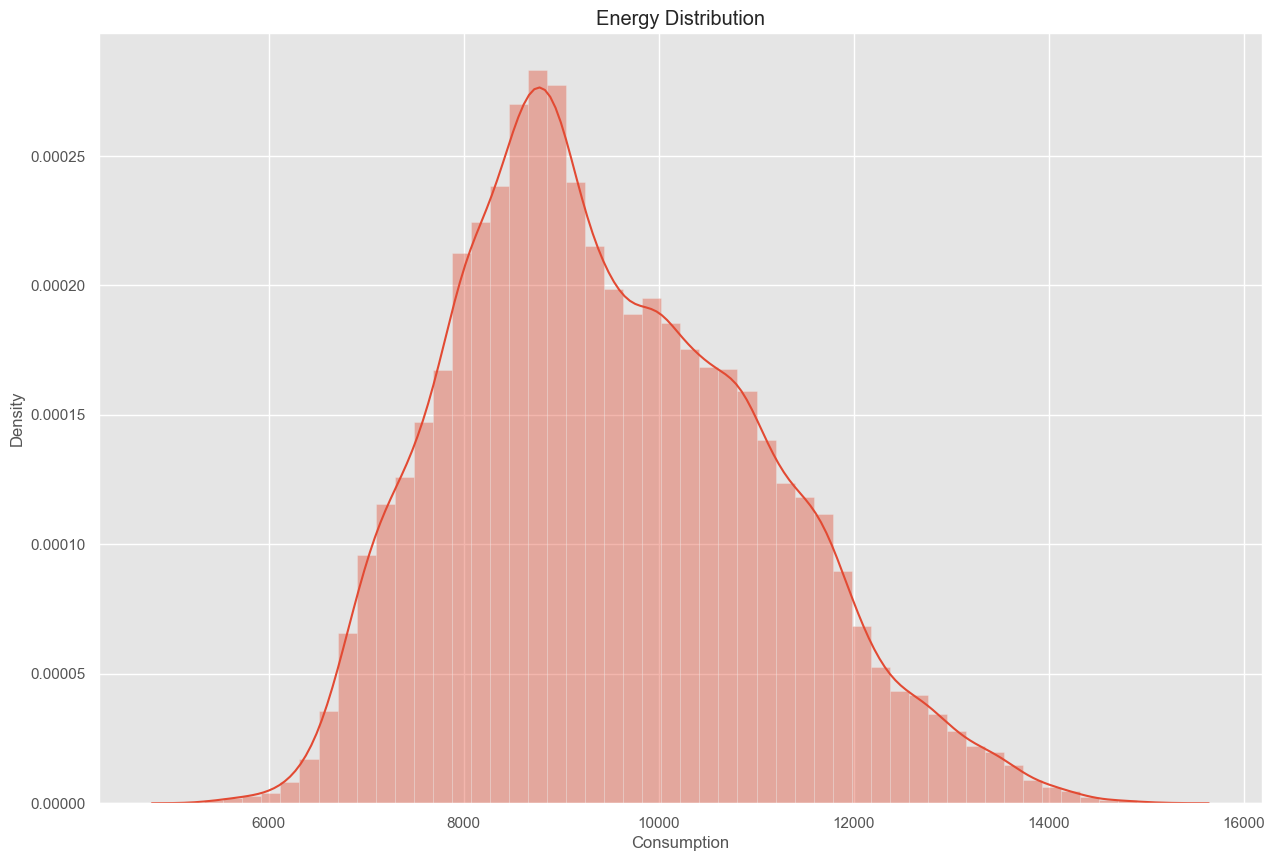

In [14]:
# Lets us see the Distribution off Energy Consumption so we have a idea about your Dataset a bit more
fig = plt.figure(figsize = (15,10))
sns.distplot(dataset["Consumption"])
plt.title("Energy Distribution")

C:\Users\bhush\AppData\Local\Temp\ipykernel_26944\4156237786.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


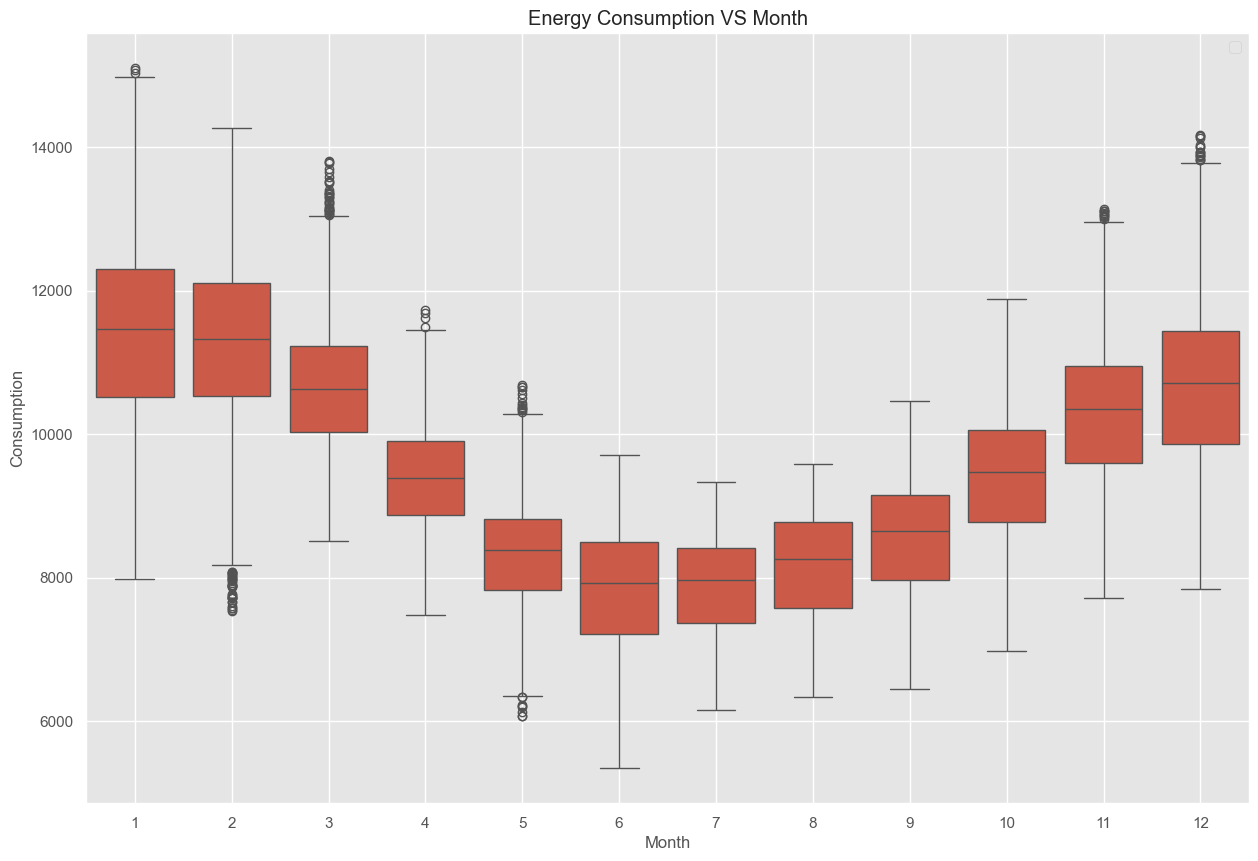

In [15]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset["Month"], y=dataset["Consumption"], data= df)
plt.title("Energy Consumption VS Month")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Error: 'DateTime' column not found. Available columns: Index(['Consumption', 'Month', 'Year', 'Date', 'Time', 'Week', 'Day'], dtype='object')
52774
52774


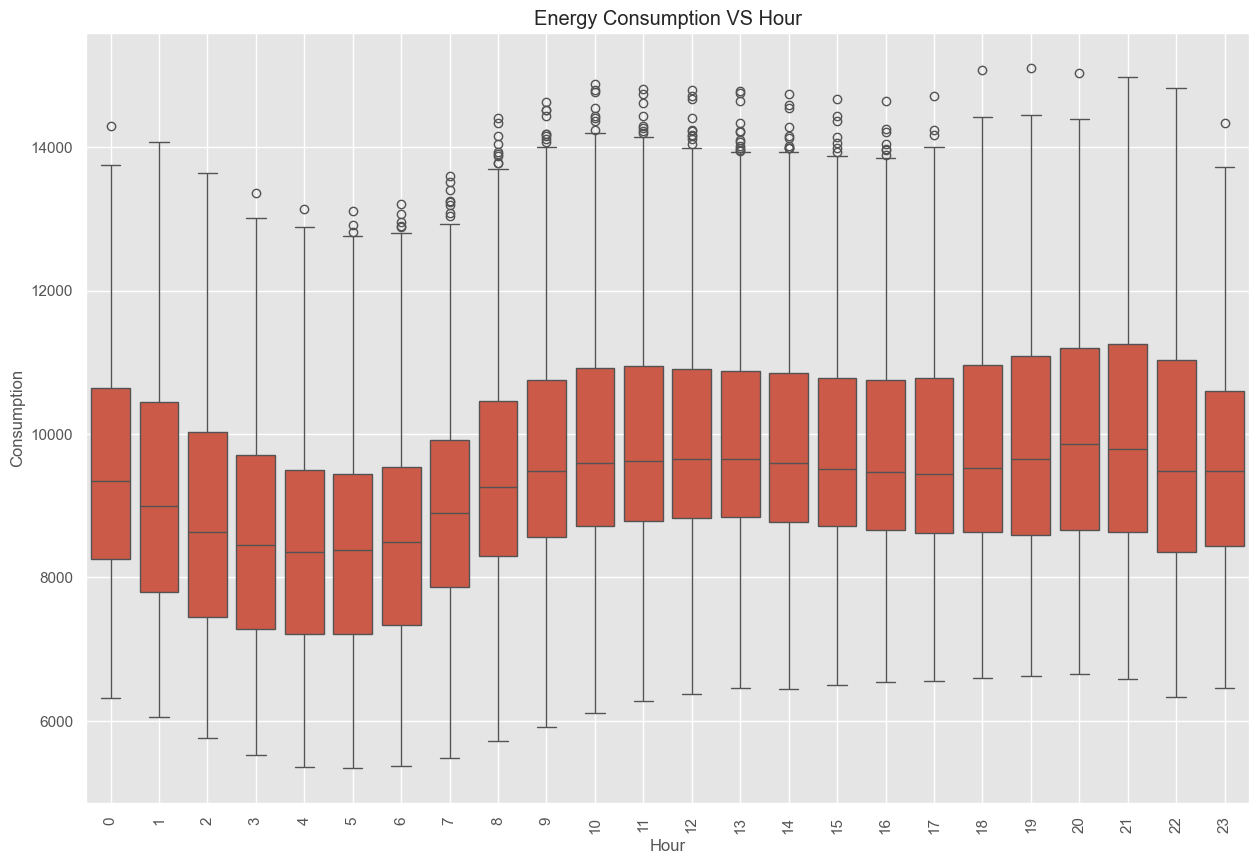

In [16]:
# Ensure datetime index
if "DateTime" in dataset.columns:
    dataset["DateTime"] = pd.to_datetime(dataset["DateTime"])
    dataset.set_index("DateTime", inplace=True)
else:
    print("Error: 'DateTime' column not found. Available columns:", dataset.columns)

dataset1 = dataset

print(len(dataset1))  # Total rows
print(len(dataset1["Consumption"].dropna()))  # Rows where Consumption is not null

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x=dataset1.index.hour, y=dataset1["Consumption"], ax=ax)
plt.title("Energy Consumption VS Hour")
plt.xlabel("Hour")
plt.grid(True, alpha=1)

# Rotate x-axis labels
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()

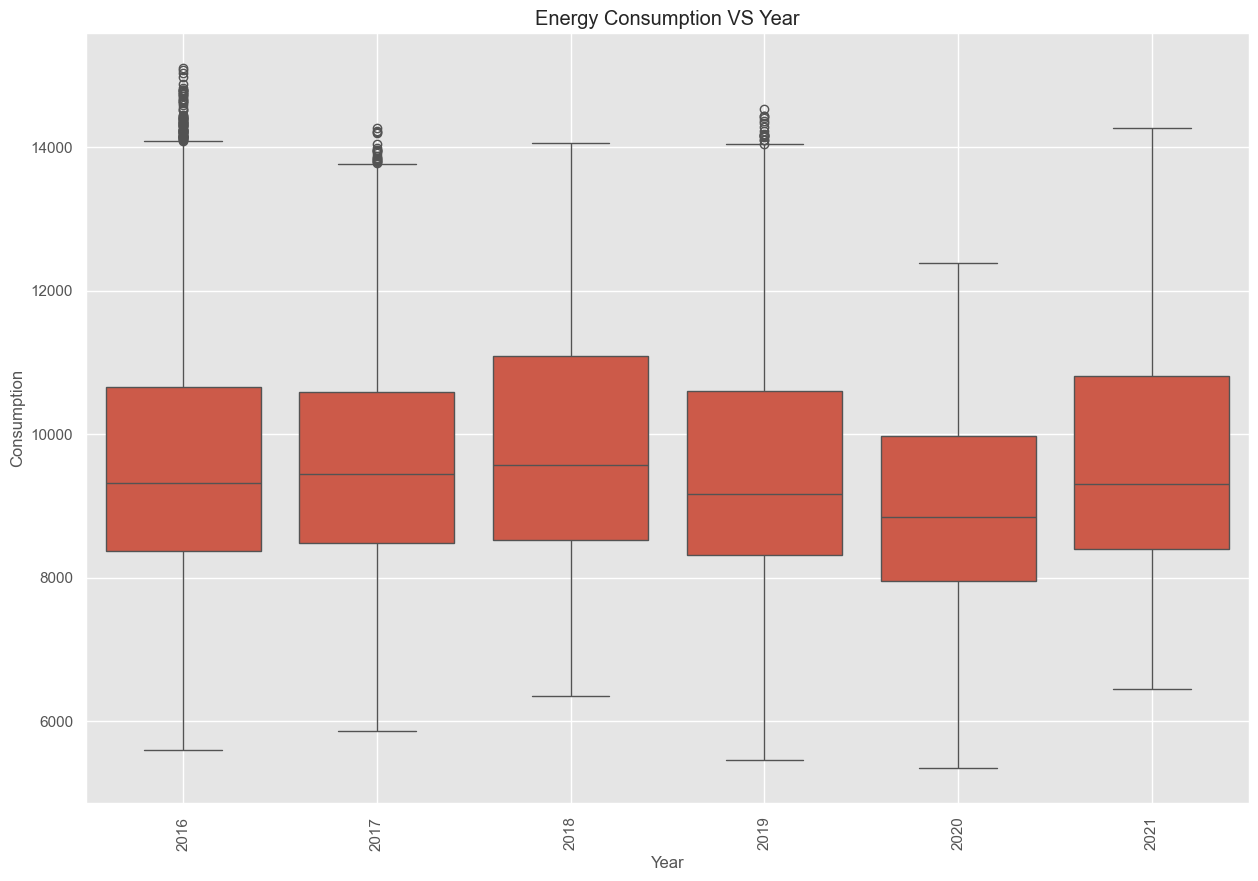

In [17]:
# Ensure 'DateTime' column is in datetime format and set as index
if "DateTime" in dataset1.columns:
    dataset1["DateTime"] = pd.to_datetime(dataset1["DateTime"])
    dataset1.set_index("DateTime", inplace=True)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Create boxplot
sns.boxplot(x=dataset1.index.year, y=dataset1["Consumption"], ax=ax)

# Titles and labels
ax.set_title("Energy Consumption VS Year")
ax.set_xlabel("Year")
ax.set_ylabel("Consumption")
ax.grid(True, alpha=1)

# Rotate x-axis labels
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)

# Show plot
plt.show()

In [18]:
print(dataset.dtypes)

Consumption     int64
Month           int64
Year            int64
Date           object
Time           object
Week            int64
Day            object
dtype: object


In [19]:
# Downsampling involves decreasing the time-frequency of the data
# Downsapling the time-frequency from hours to days 
dataset = dataset.apply(pd.to_numeric, errors="coerce")
newDataSet = dataset.resample("D").mean()

In [20]:
# We have 2193 row
# 2193 - 3 - 6 = 2184 row after omit first two rows and last six ones.  
# 2184 / 7 = 312 week  
# 312 * 80 %  250 week for train (1750 day)  
# 312 - 250 = 62 week for test (434 day)
print("Old Dataset: ", dataset.shape)
print("New Dataset: ", newDataSet.shape)

Old Dataset:  (52774, 7)
New Dataset:  (2184, 7)


In [21]:
newDataSet.head()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-04,12300.625000,1.0,2016.0,NaN,NaN,1.0,NaN
2016-01-05,12945.375000,1.0,2016.0,NaN,NaN,1.0,NaN
2016-01-06,13192.750000,1.0,2016.0,NaN,NaN,1.0,NaN
2016-01-07,14243.541667,1.0,2016.0,NaN,NaN,1.0,NaN
2016-01-08,14121.666667,1.0,2016.0,NaN,NaN,1.0,NaN


In [22]:
y = newDataSet["Consumption"]
print(y[0])
y.shape

12300.625


C:\Users\bhush\AppData\Local\Temp\ipykernel_26944\3252378364.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(y[0])


(2184,)

In [23]:
# Normalize data before model fitting
# it will boost the performance( in neural networks) + transform
from sklearn.preprocessing import MinMaxScaler
# scale of the output and input inthe range 0-1 to match the scale of the layer of LSTM
scaler = MinMaxScaler(feature_range = (0,1)) 
# reshape: convert the univariate 1D array into 2D
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])

Normalizing data before model fitting
[[0.75916744]
 [0.83908687]
 [0.86975003]
 [1.        ]
 [0.98489309]
 [0.82500258]
 [0.78623593]
 [0.83189672]
 [0.80348621]
 [0.8313604 ]]


In [24]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]

In [25]:
# building input variable
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

In [26]:
time_step = 100 
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)

In [27]:
# reshape train and input-output pairs
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

In [28]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)

X_train shape:  (1297, 100, 1)
X_test shape:  (336, 100, 1)
X_val shape:  (248, 100, 1)


In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (time_step, 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# # Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
# model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

c:\Users\bhush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = 60 ,batch_size = 20)

Epoch 1/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0330 - val_loss: 0.0074
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0081 - val_loss: 0.0056
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0072 - val_loss: 0.0042
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0062 - val_loss: 0.0038
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0072 - val_loss: 0.0046
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0064 - val_loss: 0.0041
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0058 - val_loss: 0.0038
Epoch 8/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0052 - val_loss: 0.0036
Epoch 9/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 10/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0054 - val_loss: 0.0038
Epoch 11/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0052 - val_loss: 0.0036
Epoch 12/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0

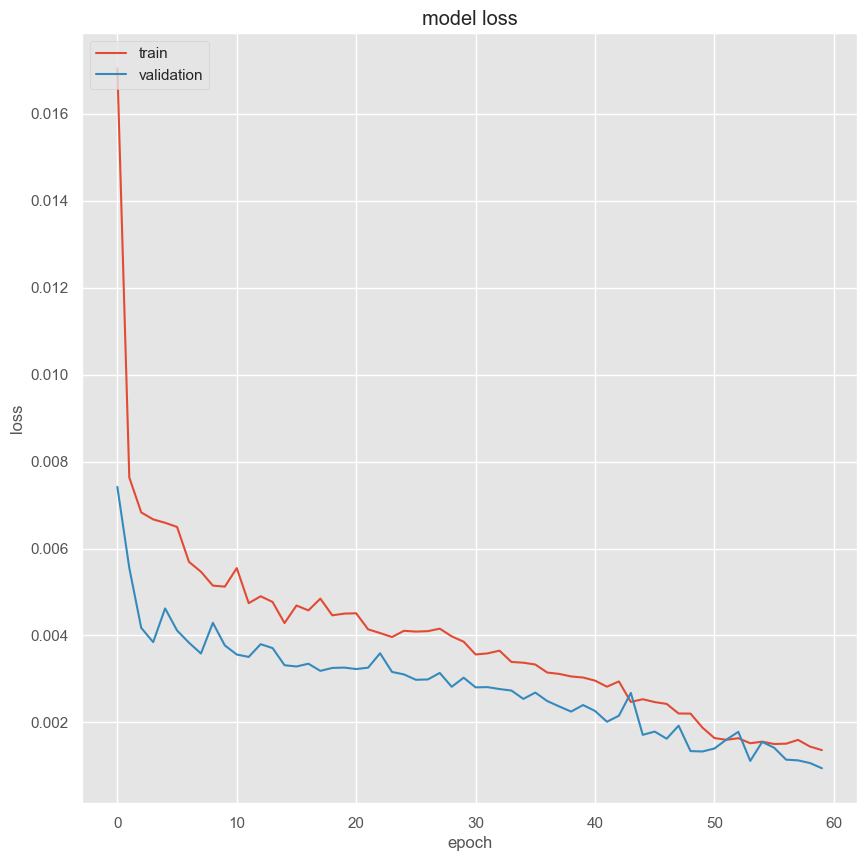

In [32]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)

In [36]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9565.966010582464

In [37]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)

(1297, 1)
(336, 1)
(248, 1)
[9393.067]
(1297,)


In [38]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


,Train Predictions,Actuals
0,[9393.0673828125],[9406.708333333334]
1,[9527.7021484375],[9614.791666666666]
2,[9560.583984375],[9894.708333333334]
3,[9330.50390625],[8933.708333333334]
4,[8726.8359375],[8557.208333333334]
...,...,...
1292,[8956.9052734375],[9259.666666666666]
1293,[9773.646484375],[10248.5]
1294,[10204.9560546875],[10360.333333333334]
1295,[10352.3291015625],[10489.833333333334]


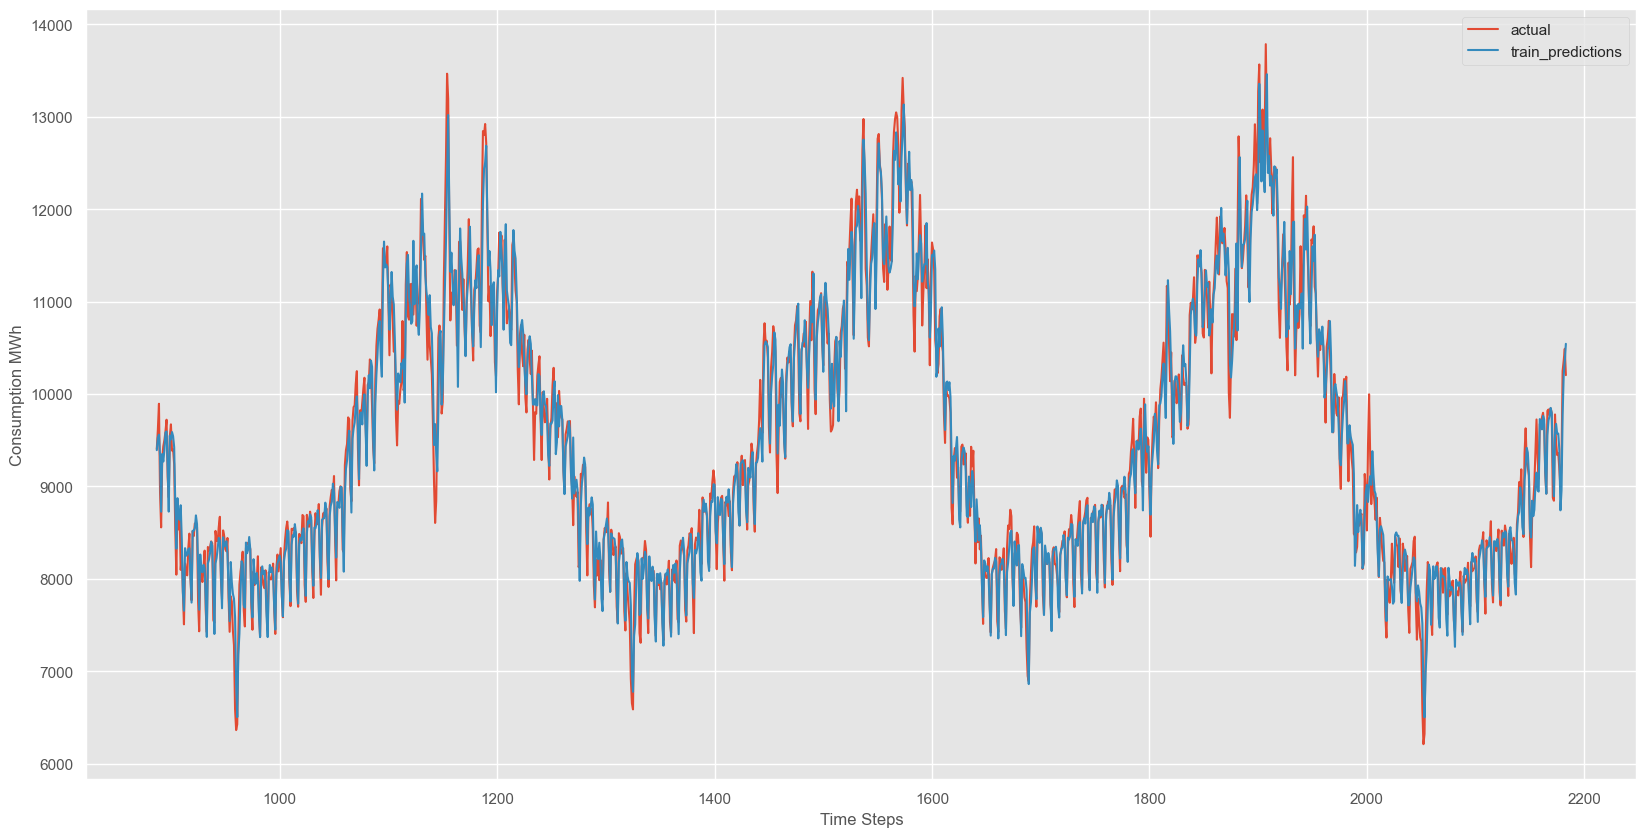

In [39]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y )
ActualPlot[:, :] = np.nan
ActualPlot[887:, :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y )
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[887:, :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

In [40]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


,Val Predictions,Actuals_val
0,[8860.8447265625],[8931.875]
1,[9028.3076171875],[9112.916666666666]
2,[9206.71875],[10019.416666666666]
3,[9923.0126953125],[10390.375]
4,[10361.2666015625],[10802.916666666666]
...,...,...
243,[8150.29541015625],[8020.541666666667]
244,[7733.39990234375],[7921.75]
245,[8429.427734375],[8705.041666666666]
246,[8726.2685546875],[8824.708333333334]


Text(0, 0.5, 'Consumption MWh')

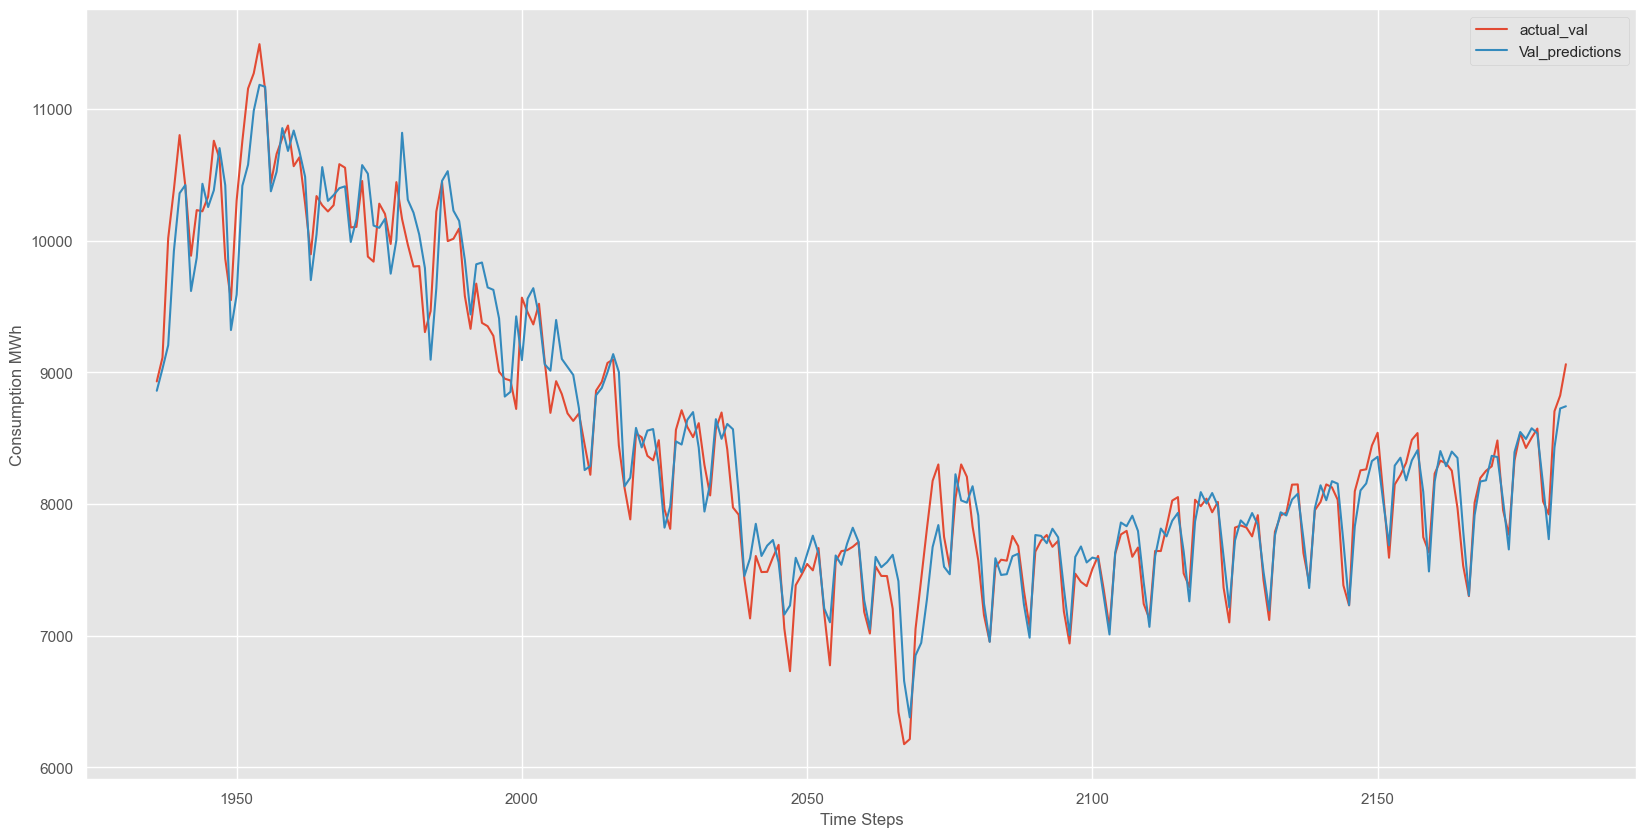

In [41]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val','Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

In [42]:
# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


,test Predictions,Actuals_test
0,[10629.7666015625],[10032.541666666666]
1,[10658.7119140625],[10732.125]
2,[10878.572265625],[10733.583333333334]
3,[10818.25],[10971.875]
4,[11130.0283203125],[11227.791666666666]
...,...,...
331,[12408.9306640625],[12540.25]
332,[12374.4111328125],[12635.958333333334]
333,[12654.9453125],[11684.333333333334]
334,[11297.9990234375],[11384.166666666666]


Text(0, 0.5, 'Consumption MWh')

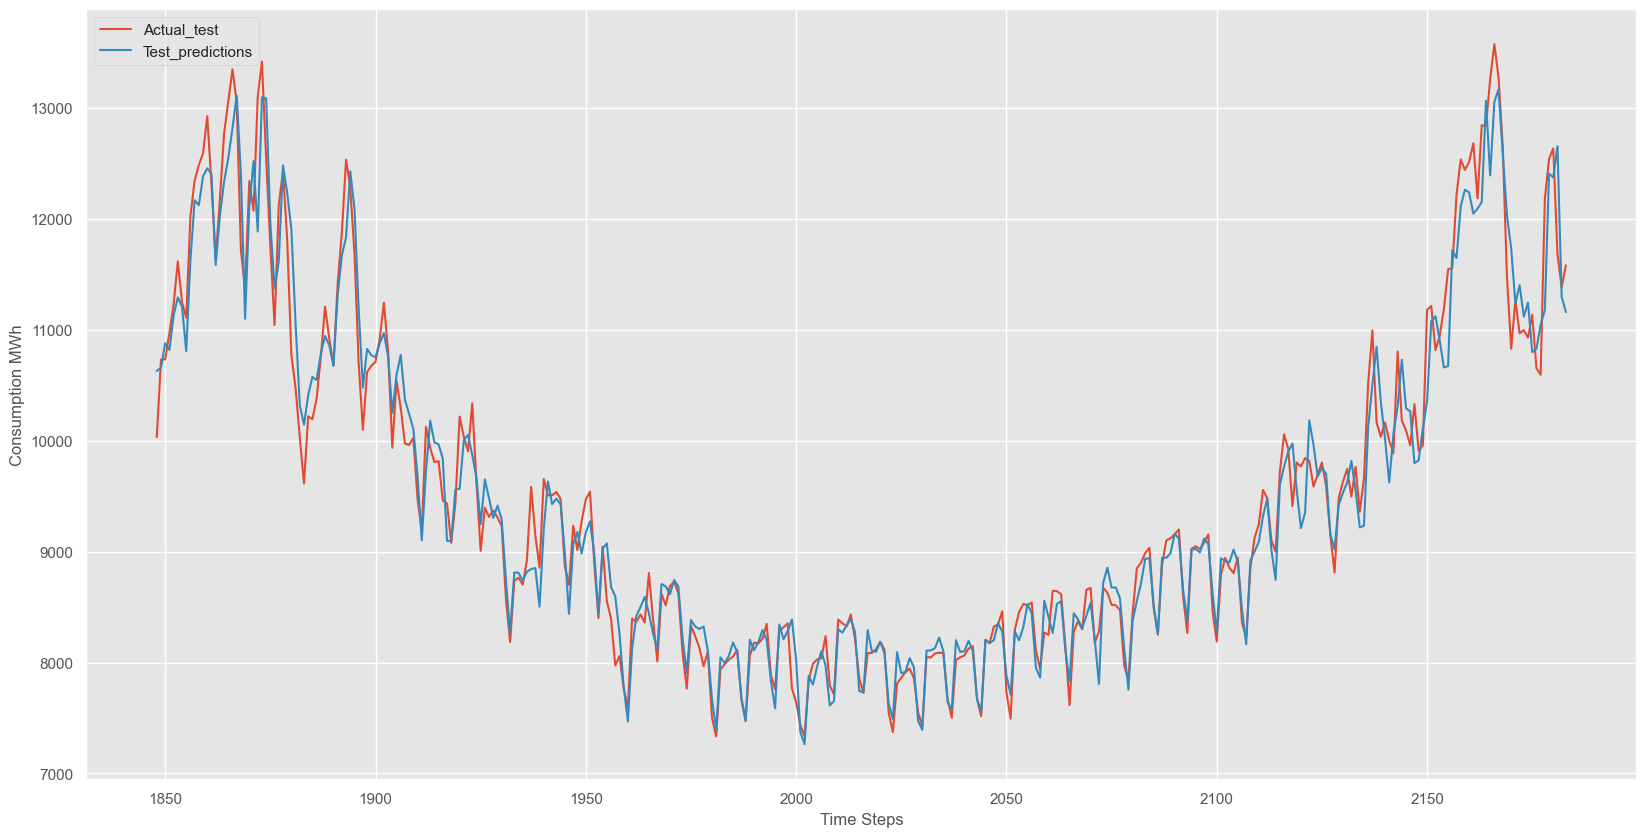

In [43]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1848:, :] = actual_test.tolist()
plt.plot(ActualPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1848:, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

plt.legend(['Actual_test','Test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

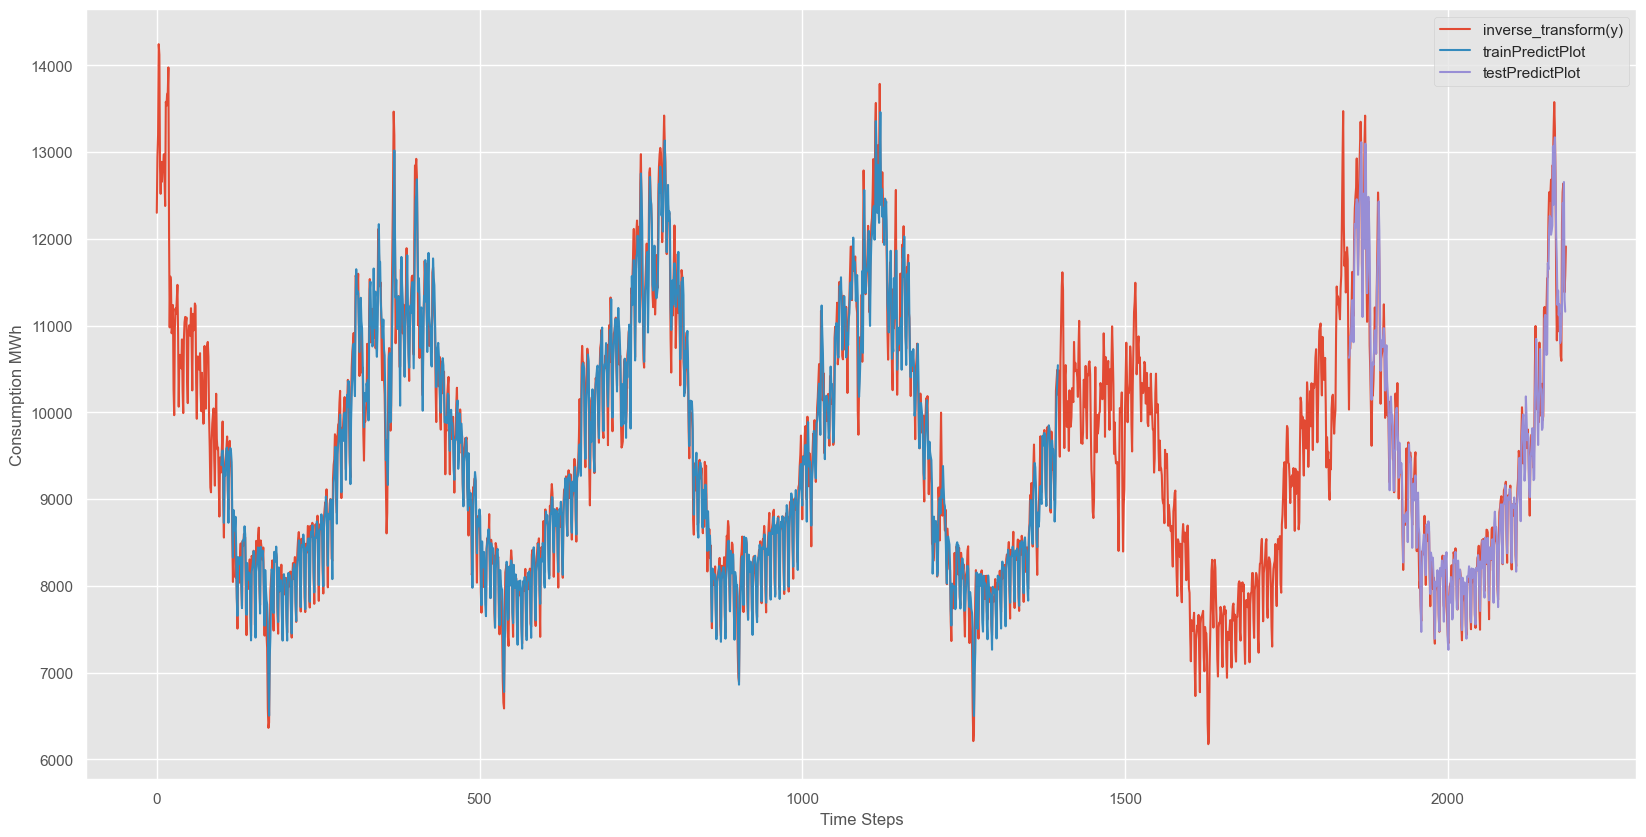

In [44]:
### Plotting 
# shift train predictions for plotting
look_back=100 #*****************************************>>>>>100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1+349:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

In [45]:
print(len(test_data))
print(test_data[0])
print(len(train_data))
x_input=test_data[337:].reshape(1,-1)
print(x_input.shape)
# print(x_input[0])
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# print(temp_input)

437
[0.40285095]
1398
(1, 100)


In [46]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
test = ""
while(i<30):
    
    if(len(temp_input)>100):
        test = "if"
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        test="else"
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

    
print(test)
print(len(lst_output))

1 day input [0.25709121 0.33563165 0.36255552 0.36498812 0.36948662 0.37489412
 0.30034604 0.25916744 0.35327446 0.35606342 0.3529749  0.36009193
 0.36937816 0.28358124 0.249561   0.32426919 0.3429811  0.33217643
 0.32601487 0.34354922 0.27053507 0.25411631 0.33202665 0.36575767
 0.38037909 0.41900114 0.40965809 0.36264332 0.34998967 0.43912819
 0.48126743 0.46479186 0.40083153 0.44962814 0.44524842 0.45453466
 0.45160624 0.42284888 0.4359467  0.44960748 0.42327755 0.3690941
 0.3264797  0.41017457 0.42818407 0.44249561 0.41147609 0.44483008
 0.39457184 0.43183555 0.53842578 0.59736597 0.49454602 0.47844231
 0.49448921 0.47407293 0.45992666 0.57367524 0.49652928 0.4854922
 0.46876872 0.51486933 0.46267431 0.46884619 0.620282   0.62459457
 0.57526598 0.59118893 0.62118583 0.6655046  0.66726578 0.74881727
 0.7883793  0.77671212 0.78571429 0.80647144 0.74484041 0.82660366
 0.82588059 0.87828737 0.91723995 0.87967669 0.80140998 0.65632683
 0.57681025 0.63147402 0.59401921 0.59759839 0.58928

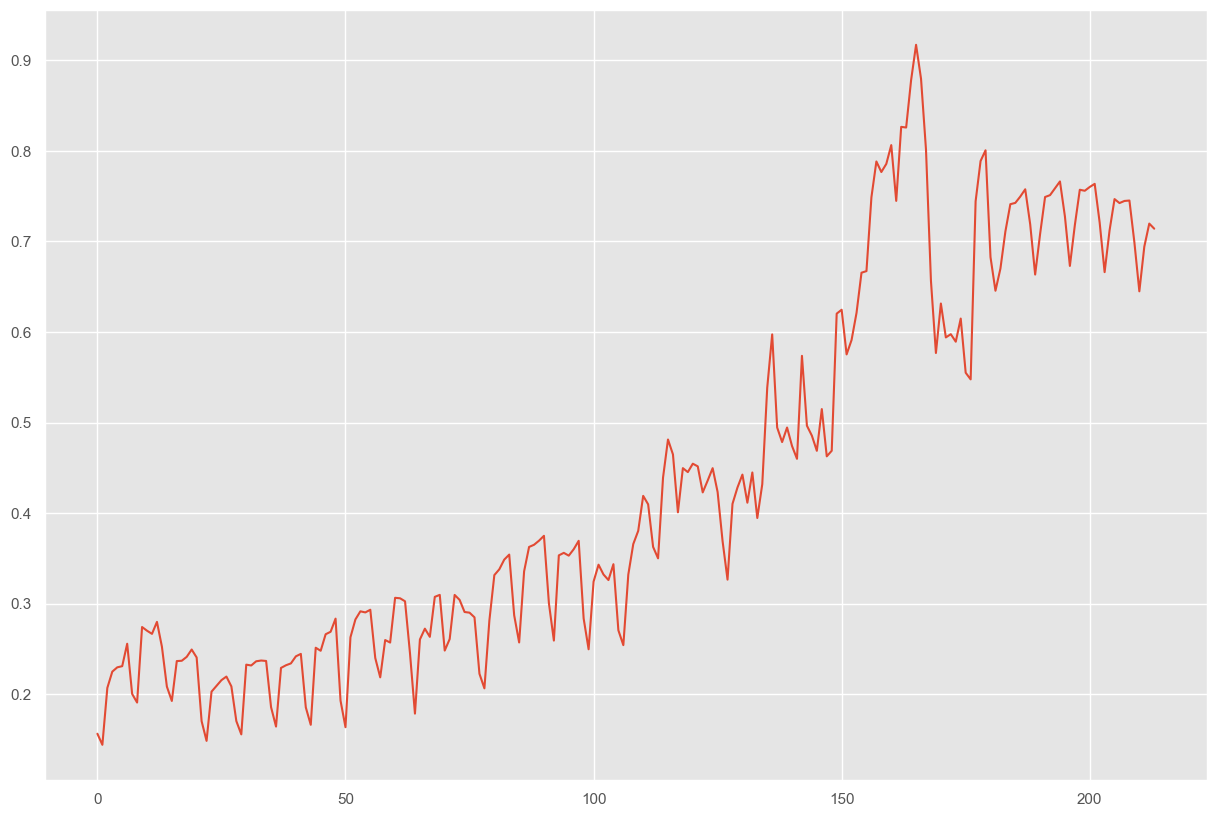

In [47]:
df3=y.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15,10))
plt.plot(df3[2000:])

In [49]:
import joblib
joblib.dump(model, 'Energy_Consumption_Prediction.pkl')

['Energy_Consumption_Prediction.pkl']

In [50]:
import tensorflow as tf

# Save the model correctly
model.save("Energy_Consumption_Prediction_Model.h5")